In [13]:
import numpy as np
import matplotlib.pyplot as plt 

In [1]:
data = np.loadtxt("fitting.txt",delimiter=" ",skiprows=1)

x = data[:,0]
y = data[:,1]
e = data[:,2]

plt.errorbar(data[:,0],data[:,1],data[:,2],fmt = "o")

NameError: name 'np' is not defined

In [56]:
def likelihood(x_obs, y_obs, sigma_y_obs, model):
    d = y_obs -  model(x_obs)
    d = d/sigma_y_obs
    d = -0.5 * np.sum(d**2) + np.sum(np.log(1/(2*np.pi*sigma_y_obs**2)**0.5))
    return np.exp(d)

In [81]:
mDadoD = []

for numparams in range(1,10):
    N = 100000
    M=0
    for i in range(N):
        p = np.poly1d(np.random.uniform(-1,1,numparams))
        M += likelihood(x,y,e,p)
    M /= N
    mDadoD.append(M)

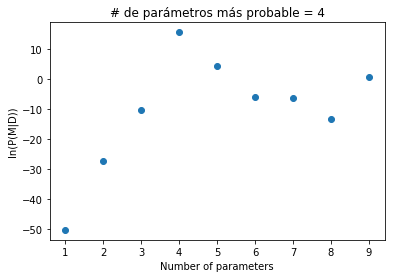

In [85]:
plt.scatter([x for x in range(1,10)],np.log(mDadoD))
plt.xlabel("Number of parameters")
plt.ylabel(r"ln(P(M|D))")
plt.title("# de parámetros más probable = {}".format(np.array([x for x in range(1,10)])[mDadoD==max(mDadoD)][0]))
plt.savefig("modelEstimationBayes.pdf")